<a href="https://colab.research.google.com/github/Sudo343/Foundations-of-ML-MA722/blob/main/Car_eval_decisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees

use car evaluation dataset for decision tree

In [3]:
install.packages("party")
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




In [4]:
car_data=read.csv("/content/car_evaluation.csv", header = T, colClasses="factor")


In [5]:
head(car_data)

,Cost,Maintainence,Doors,persons,luggage,safety,CarClass
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,vhigh,vhigh,2,2,small,low,unaccept
2,vhigh,vhigh,2,2,small,med,unaccept
3,vhigh,vhigh,2,2,small,high,unaccept
4,vhigh,vhigh,2,2,med,low,unaccept
5,vhigh,vhigh,2,2,med,med,unaccept
6,vhigh,vhigh,2,2,med,high,unaccept


In [6]:
car_data$Cost=factor(car_data$Cost)
car_data$Maintainence=factor(car_data$Maintainence)
car_data$Doors=factor(car_data$Doors)
car_data$persons=factor(car_data$persons)
car_data$luggage=factor(car_data$luggage)
car_data$safety=factor(car_data$safety)
car_data$CarClass=factor(car_data$CarClass)


now split data into training set and test set

In [10]:
summary(car_data)

    Cost     Maintainence   Doors     persons     luggage     safety   
 high :432   high :432    2    :432   2   :576   big  :576   high:576  
 low  :432   low  :432    3    :432   4   :576   med  :576   low :576  
 med  :432   med  :432    4    :432   more:576   small:576   med :576  
 vhigh:432   vhigh:432    5more:432                                    
     CarClass   
 acc     : 384  
 good    :  69  
 unaccept:1210  
 vgood   :  65  

In [15]:
dim(car_data)

[1] 1728    7

1728 records, lets split in 70:30 ratio

In [23]:
pd <- sample(2,nrow(car_data), replace = T, prob=c(0.7,0.3))
train_data <- car_data[pd==1,]
test_data <- car_data[pd==2,]

Lets make decision tree using train data

In [21]:
library(party)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



use ctree() function to get tree model, mention target var, features, and data in its args

In [24]:
output_tree = ctree(CarClass~Cost+persons+safety, data=train_data)
output_tree


	 Conditional inference tree with 7 terminal nodes

Response:  CarClass 
Inputs:  Cost, persons, safety 
Number of observations:  1214 

1) safety == {low}; criterion = 1, statistic = 304.57
  2)*  weights = 404 
1) safety == {high, med}
  3) persons == {4, more}; criterion = 1, statistic = 310.878
    4) Cost == {low, med}; criterion = 1, statistic = 195.462
      5) safety == {high}; criterion = 1, statistic = 53.111
        6)*  weights = 122 
      5) safety == {med}
        7)*  weights = 123 
    4) Cost == {high, vhigh}
      8) safety == {high}; criterion = 1, statistic = 21.71
        9) Cost == {vhigh}; criterion = 0.996, statistic = 10.414
          10)*  weights = 65 
        9) Cost == {high}
          11)*  weights = 77 
      8) safety == {med}
        12)*  weights = 145 
  3) persons == {2}
    13)*  weights = 278 

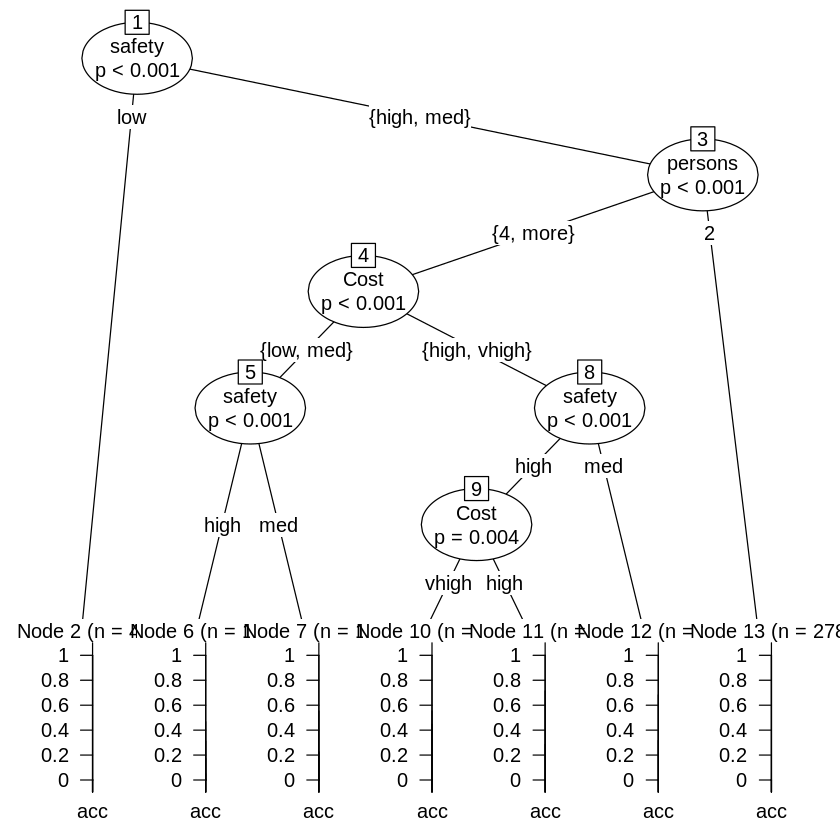

In [25]:
plot( output_tree)

lets prune the tree to desired number of nodes and make it smaller, notice the arguement " control " in ctree() function. set minimum nodes to 200.


	 Conditional inference tree with 6 terminal nodes

Response:  CarClass 
Inputs:  Cost, persons, safety 
Number of observations:  1214 

1) safety == {low}; criterion = 1, statistic = 304.57
  2)*  weights = 404 
1) safety == {high, med}
  3) persons == {4, more}; criterion = 1, statistic = 310.878
    4) Cost == {low, med}; criterion = 1, statistic = 195.462
      5) safety == {high}; criterion = 1, statistic = 53.111
        6)*  weights = 122 
      5) safety == {med}
        7)*  weights = 123 
    4) Cost == {high, vhigh}
      8) safety == {high}; criterion = 1, statistic = 21.71
        9)*  weights = 142 
      8) safety == {med}
        10)*  weights = 145 
  3) persons == {2}
    11)*  weights = 278 

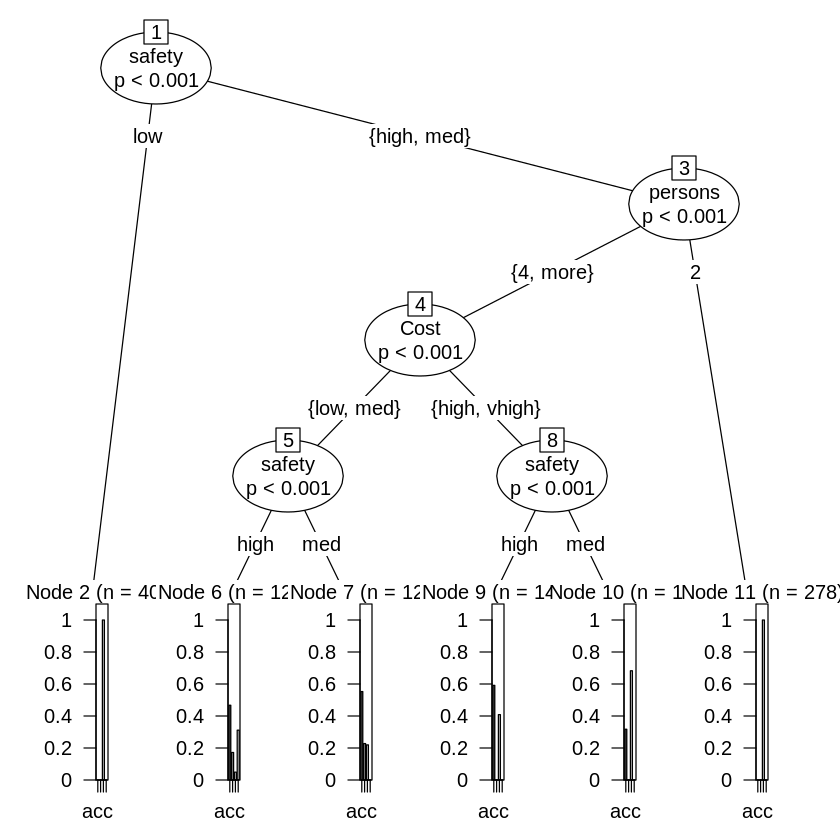

In [26]:
output_tree=ctree(CarClass~Cost+persons+safety, data=train_data, controls=ctree_control(minsplit = 200))
plot(output_tree)
output_tree

let's make predictions using the tree model we got

In [ ]:
predict(output_tree,  test_data, type = "prob")
test_pred=predict(output_tree, test_data)

let's check our tree on training data

In [28]:
tab=table(predict(output_tree), train_data$CarClass)
print (tab)

          
           acc good unaccept vgood
  acc      209   49       91    38
  good       0    0        0     0
  unaccept  46    0      781     0
  vgood      0    0        0     0


get accuaracy of tree using values from above table

In [33]:
Accuracy = sum(diag(tab)/sum(tab))
Accuracy

[1] 0.815486

misclassification error

In [34]:
Error = 1 - Accuracy
Error

[1] 0.184514

now check on test data

In [35]:
test_pred=predict(output_tree, newdata=test_data)
tab=table(test_pred,test_data$CarClass)
tab

          
test_pred  acc good unaccept vgood
  acc      110   20       32    27
  good       0    0        0     0
  unaccept  19    0      306     0
  vgood      0    0        0     0

test set Accuracy

In [36]:
sum(diag(tab)/sum(tab))

[1] 0.8093385

test set error

In [37]:
1-sum(diag(tab)/sum(tab))

[1] 0.1906615